## I plan to do an exploratory analysis of the Instacart data

In [28]:
import pandas as pd
import numpy as np
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot') # for ggplot-like style

## Import Data

In [29]:
aisles=pd.read_csv('aisles.csv')

departments=pd.read_csv('departments.csv')

orders=pd.read_csv('orders.csv')

products=pd.read_csv('products.csv')

order_products_prior=pd.read_csv('order_products__prior.csv')

order_products_train=pd.read_csv('order_products__train.csv')


## Look at the orders dataset

In [29]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [30]:
#import custoemr data
xls=pd.ExcelFile('relay-foods.xlsx')

#read the second sheet of the excel
udata=xls.parse(1)

# Extract year and month from the OrderDate column. strftim convert datetime to string 
udata['OrderPeriod'] = udata.OrderDate.apply(lambda g: g.strftime('%Y-%m')) #'%y-%m' will return 09 instead of 2009 as the year

# generate cohort group based the the earliest order date for each user id
udata['CohortGroup']=udata.groupby(level=0)['OrderDate'].min().apply(lambda g: g.strftime('%Y-%m'))

udata


,OrderId,OrderDate,UserId,TotalCharges,CommonId,PupId,PickupDate,OrderPeriod,CohortGroup
0,262,2009-01-11,47,50.6700,TRQKD,2,2009-01-12,2009-01,2009-01
1,278,2009-01-20,47,26.6000,4HH2S,3,2009-01-20,2009-01,2009-01
2,294,2009-02-03,47,38.7100,3TRDC,2,2009-02-04,2009-02,2009-02
3,301,2009-02-06,47,53.3800,NGAZJ,2,2009-02-09,2009-02,2009-02
4,302,2009-02-06,47,14.2800,FFYHD,2,2009-02-09,2009-02,2009-02
...,...,...,...,...,...,...,...,...,...
2886,3220,2010-03-08,393616,60.0155,AWNXG,15,2010-03-08,2010-03,2010-03
2887,3192,2010-03-07,394290,45.4300,AKGQT,12,2010-03-10,2010-03,2010-03
2888,3193,2010-03-07,394346,14.2100,2B47R,15,2010-03-08,2010-03,2010-03
2889,3207,2010-03-08,395039,34.6200,H6E23,4,2010-03-08,2010-03,2010-03


In [31]:
udata.groupby(['CohortGroup','OrderPeriod'],sort=0).apply( lambda g: pd.Series({\
    'TotalOrders': g.OrderId.nunique(),\
    'TotalUsers': g.UserId.nunique(),\
    'TotalCharges': g.TotalCharges.sum(),\
    }))

,,TotalOrders,TotalUsers,TotalCharges
CohortGroup,OrderPeriod,,,
2009-01,2009-01,30.0,22.0,1850.2550
2009-02,2009-02,40.0,23.0,2017.3750
2009-03,2009-03,52.0,26.0,2665.2800
2009-04,2009-04,103.0,57.0,5598.3300
2009-05,2009-05,147.0,79.0,6554.3350
2009-06,2009-06,140.0,71.0,6822.5000
2009-07,2009-07,183.0,103.0,8178.1900
2009-08,2009-08,159.0,87.0,8759.2675
2009-09,2009-09,184.0,92.0,10793.3471


In [32]:
orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [33]:
'''orders.groupby(['OrderId','UserId'],sort=0).apply( lambda g: pd.Series({\
    'TotalOrders': g.OrderNum.nunique(),\
    }))'''

"orders.groupby(['OrderId','UserId'],sort=0).apply( lambda g: pd.Series({    'TotalOrders': g.OrderNum.nunique(),    }))"

In [35]:
orders.groupby(['eval_set'],sort=0).apply( lambda g: pd.Series({\
    'TotalOrders': g.order_number.nunique(),\
    'Total': g.order_dow.nunique(),\
    }))

,TotalOrders,Total
eval_set,,
prior,99,7
train,97,7
test,97,7



## When do people order?

### Hour of Day

In [36]:
orders['order_hour_of_day']

0           8
1           7
2          12
3           7
4          15
           ..
3421078    18
3421079    10
3421080    12
3421081    12
3421082    14
Name: order_hour_of_day, Length: 3421083, dtype: int64

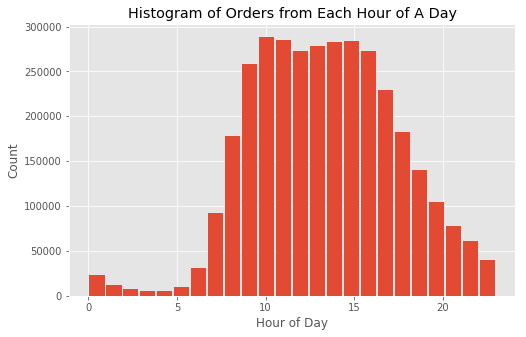

In [37]:
#count, bin_edges = np.histogram(orders['order_hour_of_day'])
orders['order_hour_of_day'].plot(kind='hist',figsize=(8, 5),bins=24, rwidth=0.90) # bins=24 means 24 bins; rwidth adjusts the width of bars to leave spaces between bars

plt.title('Histogram of Orders from Each Hour of A Day') # add a title to the histogram
plt.ylabel('Count') # add y-label
plt.xlabel('Hour of Day') # add x-label

plt.show()

### Insights: There is a clear effect of hour of the day. Most orders were placed between 10AM-4PM.

### Day of Week

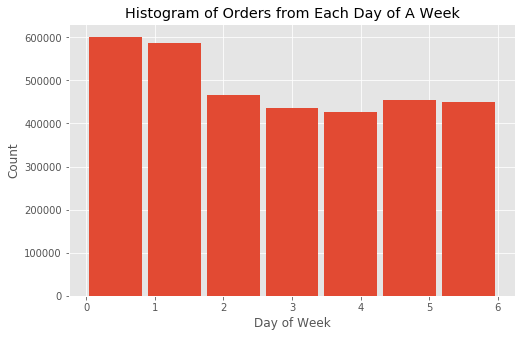

In [38]:
orders['order_dow'].plot(kind='hist',figsize=(8, 5),bins=7, rwidth=0.90) # bins=7 means 7 bins; rwidth adjusts the width of bars to leave spaces between bars

plt.title('Histogram of Orders from Each Day of A Week') # add a title to the histogram
plt.ylabel('Count') # add y-label
plt.xlabel('Day of Week') # add x-label

plt.show()

### Insights: There is a clear effect of day of the week. Most orders were placed on day 0 and 1. We can assume day 0 and 1 are weekend.

## When do they order again?

In [39]:
orders['days_since_prior_order'].max()

30.0

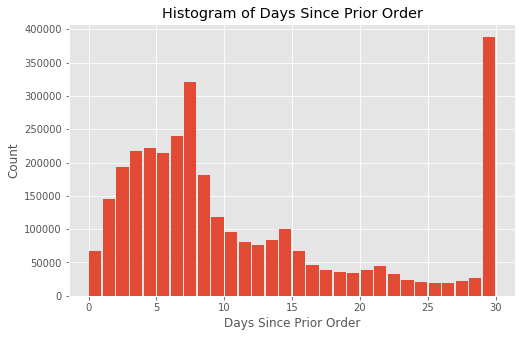

In [40]:
orders['days_since_prior_order'].plot(kind='hist',figsize=(8, 5),bins=30, rwidth=0.90) # bins=30 means 30 bins; rwidth adjusts the width of bars to leave spaces between bars

plt.title('Histogram of Days Since Prior Order') # add a title to the histogram
plt.ylabel('Count') # add y-label
plt.xlabel('Days Since Prior Order') # add x-label

plt.show()

### Insights: People order more often within 1 week of the piro order date. Saw two jump-up on the 7th day and 30th day 

## How many orders do you place each time?

In [41]:
orders['order_number'].max()

100

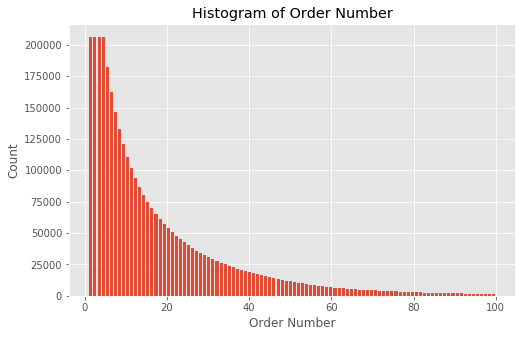

In [42]:
orders['order_number'].plot(kind='hist',figsize=(8, 5),bins=100,rwidth=0.75 ) # bins=100 means 100 bins; rwidth adjusts the width of bars to leave spaces between bars

plt.title('Histogram of Order Number') # add a title to the histogram
plt.ylabel('Count') # add y-label
plt.xlabel('Order Number') # add x-label

plt.show()

### Insights: People tend to place 1-10 orders most of the time they buy

## How many items does each order id buy?

Let’s have a look how many items are in the orders. The distributions are comparable between the train and prior order set.

In [44]:
order_products_prior

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


In [47]:
# Group by add_to_cart_order for prior set
order_id_cnt = order_products_prior.groupby(['order_id']).apply(lambda g: pd.Series({\
    'Item_number':g.add_to_cart_order.max(),\
}))

In [48]:
order_id_cnt

,Item_number
order_id,
2,9
3,8
4,13
5,26
6,3
...,...
3421079,1
3421080,9
3421081,7


In [50]:
order_id_cnt['Item_number'].max()

145

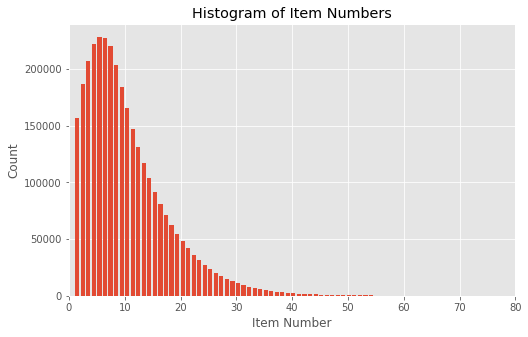

In [56]:
# Plot the histogram of order items for prior set
order_id_cnt['Item_number'].plot(kind='hist',figsize=(8, 5),bins=145, rwidth=0.75 ) # bins=100 means 100 bins; rwidth adjusts the width of bars to leave spaces between bars

plt.xlim(xmin=0, xmax = 80) # xmax limts the x range
plt.title('Histogram of Item Numbers') # add a title to the histogram
plt.ylabel('Count') # add y-label
plt.xlabel('Item Number') # add x-label

plt.show()

In [58]:
# Group by add_to_cart_order for train set
order_id_cnt_tn = order_products_train.groupby(['order_id']).apply(lambda g: pd.Series({\
    'Item_number':g.add_to_cart_order.max(),\
}))

In [61]:
order_id_cnt_tn.max()

Item_number    80
dtype: int64

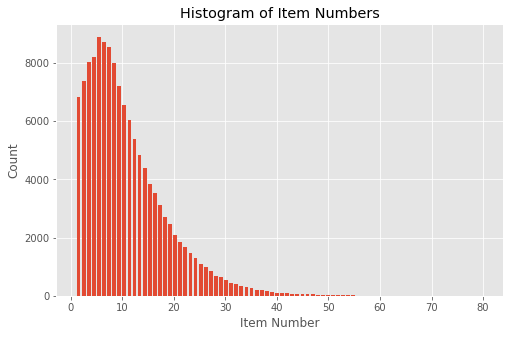

In [62]:
# Plot the histogram of order items for train set
order_id_cnt_tn['Item_number'].plot(kind='hist',figsize=(8, 5),bins=80, rwidth=0.75 ) # bins=100 means 100 bins; rwidth adjusts the width of bars to leave spaces between bars

#plt.xlim(xmin=0, xmax = 80) # xmax limts the x range
plt.title('Histogram of Item Numbers') # add a title to the histogram
plt.ylabel('Count') # add y-label
plt.xlabel('Item Number') # add x-label

plt.show()

## Bestsellers

Let’s have a look which products are sold most often (top10). And the clear winner is: Bananas

In [81]:
# First, concat the records of order_products_prior with order_products_train
orders_products = pd.concat([order_products_prior, order_products_train], ignore_index=True, sort=False)

In [71]:
order_products_prior[order_products_prior['product_id']==33120]

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
237,26,33120,5,0
1084,120,33120,13,0
3039,327,33120,5,1
3709,390,33120,28,1
...,...,...,...,...
32426668,3420280,33120,6,1
32427659,3420373,33120,11,0
32429809,3420587,33120,1,1
32430947,3420711,33120,8,0


In [92]:
# Group by prodcut_id 
product_id_cnt=orders_products.groupby('product_id').apply(lambda g: pd.Series({\
    'Count':g.product_id.count(),\
})).reset_index()

In [93]:
product_id_cnt

,product_id,Count
0,1,1928
1,2,94
2,3,283
3,4,351
4,5,16
...,...,...
49680,49684,9
49681,49685,49
49682,49686,127
49683,49687,14


In [95]:
# Merge product_id_cnt with products
product_cnt = pd.merge(product_id_cnt, products, how='left', on='product_id', validate = '1:1') # validate = '1:1' means check if merge keys are unique in both left and right datasets. if not unique in any side, an error will be returned.

In [98]:
product_cnt

,product_id,Count,product_name,aisle_id,department_id
0,1,1928,Chocolate Sandwich Cookies,61,19
1,2,94,All-Seasons Salt,104,13
2,3,283,Robust Golden Unsweetened Oolong Tea,94,7
3,4,351,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,16,Green Chile Anytime Sauce,5,13
...,...,...,...,...,...
49680,49684,9,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49681,49685,49,En Croute Roast Hazelnut Cranberry,42,1
49682,49686,127,Artisan Baguette,112,3
49683,49687,14,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [107]:
# Return the top 10 products by sales
product_top_10 = product_cnt.sort_values(by='Count', ascending=False)[['product_name','Count']][:10]

In [108]:
# Set product_name as index
product_top_10.set_index('product_name', inplace=True)

In [109]:
product_top_10

,Count
product_name,
Banana,491291
Bag of Organic Bananas,394930
Organic Strawberries,275577
Organic Baby Spinach,251705
Organic Hass Avocado,220877
Organic Avocado,184224
Large Lemon,160792
Strawberries,149445
Limes,146660


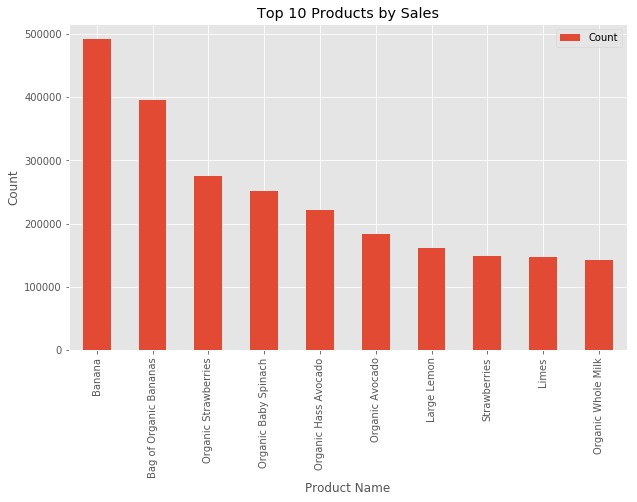

In [106]:
# Draw a bar chart for the top 10 products by sales

product_top_10.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Product Name') # add to x-label to the plot
plt.ylabel('Count') # add y-label to the plot
plt.title('Top 10 Products by Sales') # add title to the plot

plt.show()

## How often do people order the same items again?

Look at train data set

In [113]:
# Count the frequency of reordered 
reorder_cnt_tn = order_products_train.groupby(['reordered']).apply(lambda g: pd.Series({\
                                    'count':g.reordered.count(),\
}))

In [114]:
reorder_cnt_tn

,count
reordered,
0,555793
1,828824


In [130]:
list(reorder_cnt_tn.index)

[0, 1]

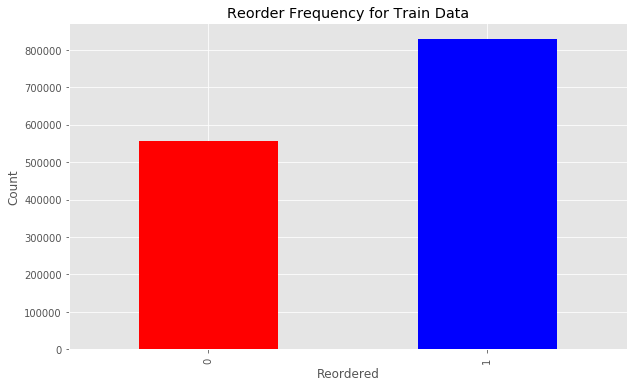

In [139]:
# Draw a bar chart for reorder frequency for train data
from itertools import cycle, islice
from matplotlib.pyplot import *

#my_colors = [plt.cm.Paired(np.arange(len(reorder_cnt_tn)))]
my_colors='rb'# set the color of the first bar chart to red and the second one to blue; r means read and b means blue
reorder_cnt_tn.plot(kind='bar', figsize=(10, 6), color=my_colors, legend=None) # pass my_colors to the color setting
                                                                              # legend=None means hide legend
plt.xlabel('Reordered') # add to x-label to the plot
plt.ylabel('Count') # add y-label to the plot
plt.title('Reorder Frequency for Train Data') # add title to the plot

plt.show()

## What are the most often reordered products?

Now here it becomes really interesting. These 10 products have the highest probability of being reordered.

In [4]:
order_products_train

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


In [21]:
# calculate the probability of being reordered
proportion_reordered = order_products_train.groupby('product_id').apply(lambda g: pd.Series({\
                                        'proportion_reordered': g.reordered.mean(),\
                                        'Order_Number': g.product_id.count(),\
}))

In [22]:
# sort values by proportion_Recordered
proportion_reordered.sort_values(by='proportion_reordered', ascending=False)

,proportion_reordered,Order_Number
product_id,,
24836,1.0,1.0
6708,1.0,1.0
29977,1.0,1.0
29988,1.0,2.0
30002,1.0,1.0
...,...,...
5243,0.0,1.0
22243,0.0,3.0
3003,0.0,2.0


In [26]:
proportion_reordered.loc[1729]

proportion_reordered     0.934783
Order_Number            92.000000
Name: 1729, dtype: float64

In [30]:
# filter out products with order number <40
proportion_reordered=proportion_reordered[proportion_reordered['Order_Number']>=40]

In [31]:
# find out the top 10 product ids by proportion_reordered
proportion_reordered_top10 = proportion_reordered.sort_values(by='proportion_reordered', ascending=False)[:10]

In [32]:
proportion_reordered_top10

,proportion_reordered,Order_Number
product_id,,
1729,0.934783,92.0
20940,0.913043,368.0
12193,0.898305,59.0
31764,0.888889,45.0
21038,0.888889,81.0
24852,0.884172,18726.0
117,0.883333,120.0
39180,0.881988,483.0
12384,0.881041,269.0


In [33]:
# find out the product name of top 10 products
product_top10_reordered = pd.merge(proportion_reordered_top10, products, how='left', on='product_id', validate = '1:1') # validate = '1:1' means check if merge keys are unique in both left and right datasets. if not unique in any side, an error will be returned.

In [34]:
product_top10_reordered

,product_id,proportion_reordered,Order_Number,product_name,aisle_id,department_id
0,1729,0.934783,92.0,2% Lactose Free Milk,84,16
1,20940,0.913043,368.0,Organic Low Fat Milk,84,16
2,12193,0.898305,59.0,100% Florida Orange Juice,98,7
3,31764,0.888889,45.0,Original Sparkling Seltzer Water Cans,115,7
4,21038,0.888889,81.0,Organic Spelt Tortillas,128,3
5,24852,0.884172,18726.0,Banana,24,4
6,117,0.883333,120.0,Petit Suisse Fruit,2,16
7,39180,0.881988,483.0,Organic Lowfat 1% Milk,84,16
8,12384,0.881041,269.0,Organic Lactose Free 1% Lowfat Milk,91,16
9,24024,0.878525,461.0,1% Lowfat Milk,84,16


In [38]:
# only include 'product_name' and 'proportion_reordered', and set 'product_name' as index
product_top10_reordered[['product_name','proportion_reordered']].set_index('product_name')

,proportion_reordered
product_name,
2% Lactose Free Milk,0.934783
Organic Low Fat Milk,0.913043
100% Florida Orange Juice,0.898305
Original Sparkling Seltzer Water Cans,0.888889
Organic Spelt Tortillas,0.888889
Banana,0.884172
Petit Suisse Fruit,0.883333
Organic Lowfat 1% Milk,0.881988
Organic Lactose Free 1% Lowfat Milk,0.881041


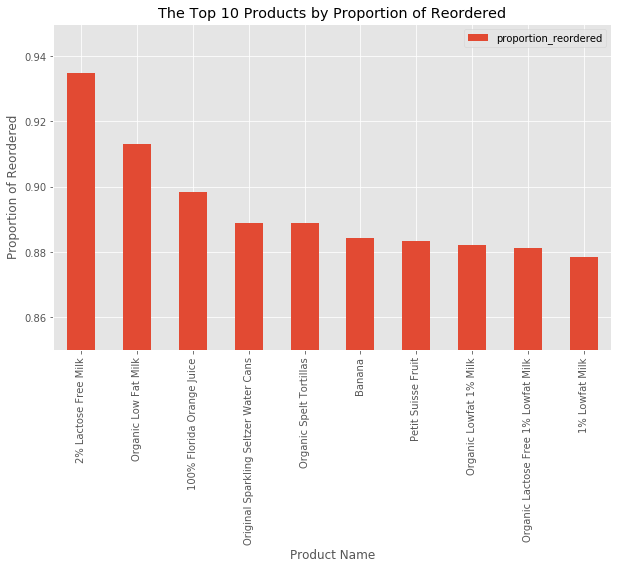

In [41]:
# draw a bar chart
#my_colors='rb'# set the color of the first bar chart to red and the second one to blue; r means read and b means blue
product_top10_reordered[['product_name','proportion_reordered']].set_index('product_name').plot(kind='bar', figsize=(10, 6)) 
                                                                              
plt.xlabel('Product Name') # add to x-label to the plot
plt.ylabel('Proportion of Reordered') # add y-label to the plot
plt.title('The Top 10 Products by Proportion of Reordered') # add title to the plot
plt.ylim((0.85,0.95)) # adjust the range of y axis so that the difference between bars are more clear

plt.show()

## Which item do people put into the cart first?

In [33]:
# calcualte the frequency each product id was put into the cart first, the total frequence each product was put into a cart, and the percentage of being put into the cart first 
order_products_train_first_pct=order_products_train.groupby('product_id').apply(lambda g: pd.Series({\
    'count': sum(g['add_to_cart_order']==1),\  #used a filter function here to calculate the frequency of being put into the cart first
     'total_count': g.add_to_cart_order.count(),\
    'pct': sum(g['add_to_cart_order']==1)/g.add_to_cart_order.count()
}))

In [43]:
# only keep the products with count>10 and then find the top 10 products by pct; rest the index so that product_id becomes a column
product_top10_first_order=order_products_train_first_pct[order_products_train_first_pct['count']>10].sort_values(by='pct', ascending=False)[:10].reset_index()

In [44]:
product_top10_first_order

,product_id,count,total_count,pct
0,45004,39.0,59.0,0.661017
1,11885,41.0,69.0,0.594203
2,13128,12.0,21.0,0.571429
3,4100,14.0,25.0,0.560000
4,1729,48.0,92.0,0.521739
5,6729,35.0,72.0,0.486111
6,9285,13.0,27.0,0.481481
7,6848,12.0,26.0,0.461538
8,12640,12.0,26.0,0.461538
9,26405,47.0,105.0,0.447619


In [45]:
# merge with products table to get the product names
product_top10_first_order = pd.merge(product_top10_first_order, products, how='left', on='product_id', validate = '1:1') # validate = '1:1' means check if merge keys are unique in both left and right datasets. if not unique in any side, an error will be returned.

In [46]:
product_top10_first_order

,product_id,count,total_count,pct,product_name,aisle_id,department_id
0,45004,39.0,59.0,0.661017,White Multifold Towels,54,17
1,11885,41.0,69.0,0.594203,"Sparkling Water, Bottles",115,7
2,13128,12.0,21.0,0.571429,Purified Alkalkine Water with Minerals pH10,115,7
3,4100,14.0,25.0,0.560000,Organic Dark Roast,26,7
4,1729,48.0,92.0,0.521739,2% Lactose Free Milk,84,16
5,6729,35.0,72.0,0.486111,Cookie Tray,8,3
6,9285,13.0,27.0,0.481481,Boneless Pork Shoulder Butt,7,12
7,6848,12.0,26.0,0.461538,Party Tumblers,111,17
8,12640,12.0,26.0,0.461538,Sport Bottle with Flip Cap Natural Spring Water,115,7
9,26405,47.0,105.0,0.447619,XL Pick-A-Size Paper Towel Rolls,54,17


In [49]:
# only include 'product_name' and 'pct', and set 'product_name' as index
product_top10_first_order[['product_name','pct']].set_index('product_name')

,pct
product_name,
White Multifold Towels,0.661017
"Sparkling Water, Bottles",0.594203
Purified Alkalkine Water with Minerals pH10,0.571429
Organic Dark Roast,0.560000
2% Lactose Free Milk,0.521739
Cookie Tray,0.486111
Boneless Pork Shoulder Butt,0.481481
Party Tumblers,0.461538
Sport Bottle with Flip Cap Natural Spring Water,0.461538


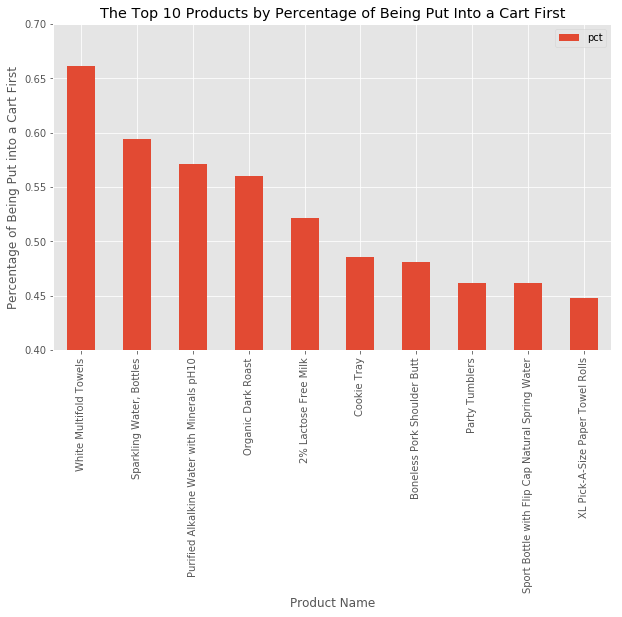

In [52]:
# draw a bar chart
#my_colors='rb'# set the color of the first bar chart to red and the second one to blue; r means read and b means blue
product_top10_first_order[['product_name','pct']].set_index('product_name').plot(kind='bar', figsize=(10, 6)) 
                                                                              
plt.xlabel('Product Name') # add to x-label to the plot
plt.ylabel('Percentage of Being Put into a Cart First') # add y-label to the plot
plt.title('The Top 10 Products by Percentage of Being Put Into a Cart First') # add title to the plot
plt.ylim((0.4,0.7)) # adjust the range of y axis so that the difference between bars are more clear

plt.show()

### Insights: People seem to be quite certain about Multifold Towels and if they buy them, put them into their cart first in 66% of the time.

## Association between time of last order and probability of reorder

In [58]:
# merge order_products_train with orders
order_products_train_m = pd.merge(order_products_train, orders, how='left', on='order_id', validate = 'm:1') # validate = 'm:1' means check if merge keys is unique in right datasets. if not unique in right side, an error will be returned.

In [61]:
order_products_train_time_reorder = order_products_train_m.groupby('days_since_prior_order').apply(lambda g: pd.Series({\
    'mean_reordered' : g.reordered.mean(),\
}))

In [62]:
order_products_train_time_reorder

,mean_reordered
days_since_prior_order,
0.0,0.824220
1.0,0.615261
2.0,0.619692
3.0,0.653187
4.0,0.675509
5.0,0.672358
6.0,0.678020
7.0,0.702381
8.0,0.678135


In [66]:
# convert the index to integer
order_products_train_time_reorder.index = order_products_train_time_reorder.index.astype(int)
order_products_train_time_reorder

,mean_reordered
days_since_prior_order,
0,0.824220
1,0.615261
2,0.619692
3,0.653187
4,0.675509
5,0.672358
6,0.678020
7,0.702381
8,0.678135


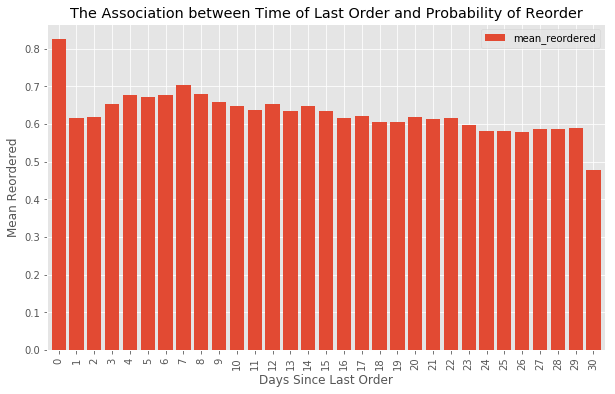

In [67]:
# draw a bar chart
#my_colors='rb'# set the color of the first bar chart to red and the second one to blue; r means read and b means blue
order_products_train_time_reorder.plot(kind='bar', figsize=(10, 6), width=0.8) # width adjusts the width of bars
                                                                              
plt.xlabel('Days Since Last Order') # add to x-label to the plot
plt.ylabel('Mean Reordered') # add y-label to the plot
plt.title('The Association between Time of Last Order and Probability of Reorder') # add title to the plot
#plt.ylim((0.4,0.7)) # adjust the range of y axis so that the difference between bars are more clear

plt.show()

### Insights: We can see that if people order again on the same day, they order the same product more often. Whereas when 30 days have passed, they tend to try out new things in their order.

## Association between number of orders and probability of reordering

In [68]:
order_products_train

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


In [69]:
association_numorder_reorder = order_products_train.groupby('product_id').apply(lambda g: pd.Series({\
    'proportion_reordered' : g.reordered.mean(),\
    'number_orders' : g.product_id.count()
}))

In [70]:
association_numorder_reorder

,proportion_reordered,number_orders
product_id,,
1,0.644737,76.0
2,0.250000,4.0
3,1.000000,6.0
4,0.636364,22.0
5,1.000000,1.0
...,...,...
49682,0.000000,5.0
49683,0.708247,2413.0
49686,0.714286,7.0


[  1.16977472e-04   4.30778769e-01]


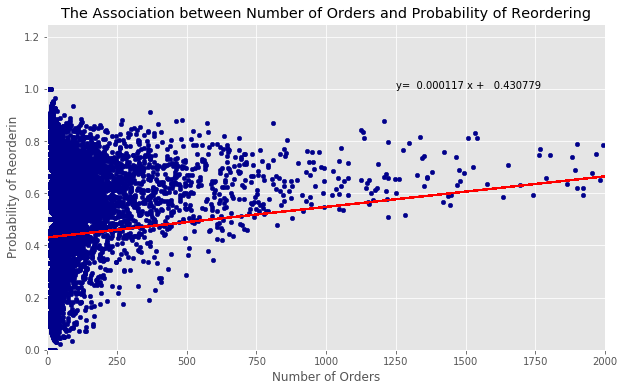

In [103]:
# draw a scatter plot
association_numorder_reorder.plot(kind='scatter', x='number_orders', y='proportion_reordered', figsize=(10, 6), color='darkblue')

plt.title('The Association between Number of Orders and Probability of Reordering')
plt.xlabel('Number of Orders')
plt.ylabel('Probability of Reorderin')
plt.xlim((0,2000)) # adjust the range of x axis so that the trend is more clear
plt.ylim((0,1.25)) # adjust the range of y axis so that the trend is more clear

#  Get the equation of line of best fit. We will use Numpy's polyfit() method by passing in the following:
x = association_numorder_reorder['number_orders']      # year on x-axis
y = association_numorder_reorder['proportion_reordered']     # total on y-axis
fit = np.polyfit(x, y, deg=1) #deg: Degree of fitting polynomial. 1 = linear, 2 = quadratic, and so on.
print(fit)

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is number_orders
plt.annotate('y={0:10f} x + {1:10f}'.format(fit[0], fit[1]), xy=(1250, 1.0)) # xy identify the location of the annotation
                # 10f means displaying float; if we want to display interger, try .0f
plt.show()

### Insights: Products with a high number of orders are naturally more likely to be reordered. However, there seems to be a ceiling effect.

## Organic vs Non-organic

What is the percentage of orders that are organic vs. not organic?

In [109]:
products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [113]:
# str.lower() convert all strings to lower case. str.contains check whether a string patter is contained
products['product_name'].str.lower().str.contains('organic')

0        False
1        False
2        False
3        False
4        False
         ...  
49683    False
49684    False
49685    False
49686    False
49687    False
Name: product_name, Length: 49688, dtype: bool

In [133]:
# add a new column 'organic'; if the lower case of product_name contains 'organic' then the value under column 'organic' is organic; otherwise, not organi
products['organic'] = np.where(products['product_name'].str.lower().str.contains('organic'), 'organic', 'not_organic') 
products

,product_id,product_name,aisle_id,department_id,organic
0,1,Chocolate Sandwich Cookies,61,19,not_organic
1,2,All-Seasons Salt,104,13,not_organic
2,3,Robust Golden Unsweetened Oolong Tea,94,7,not_organic
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,not_organic
4,5,Green Chile Anytime Sauce,5,13,not_organic
...,...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5,not_organic
49684,49685,En Croute Roast Hazelnut Cranberry,42,1,not_organic
49685,49686,Artisan Baguette,112,3,not_organic
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8,not_organic


In [134]:
# merge products table with order_products_train table 
order_products_train_org = pd.merge(order_products_train, products, how='left', on='product_id', validate = 'm:1') # validate = '1:1' means check if merge keys are unique in both left and right datasets. if not unique in any side, an error will be returned.

In [135]:
order_products_train_org

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,organic
0,1,49302,1,1,Bulgarian Yogurt,120,16,not_organic
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,organic
2,1,10246,3,0,Organic Celery Hearts,83,4,organic
3,1,49683,4,0,Cucumber Kirby,83,4,not_organic
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,not_organic
...,...,...,...,...,...,...,...,...
1384612,3421063,14233,3,1,Natural Artesian Water,115,7,not_organic
1384613,3421063,35548,4,1,Twice Baked Potatoes,13,20,not_organic
1384614,3421070,35951,1,1,Organic Unsweetened Almond Milk,91,16,organic
1384615,3421070,16953,2,1,Creamy Peanut Butter,88,13,not_organic


In [137]:
# Count the numbers of oragnic v.s. organic
organic_pct = order_products_train_org.groupby(['organic']).apply(lambda g: pd.Series({\
                                    'count':g.organic.count(),\
}))
organic_pct

,count
organic,
not_organic,979000
organic,405617


In [161]:
# calcualte a values for the new column 'proportion'
organic_pct['proportion']= np.where(organic_pct.index =='not_organic',organic_pct['count'].iloc[0]/organic_pct['count'].sum(),
                                   organic_pct['count'].iloc[1]/organic_pct['count'].sum())


In [178]:
organic_pct.index

Index(['not_organic', 'organic'], dtype='object', name='organic')

In [179]:
organic_pct.count

<bound method DataFrame.count of               count  proportion
organic                        
not_organic  979000    0.707055
organic      405617    0.292945>

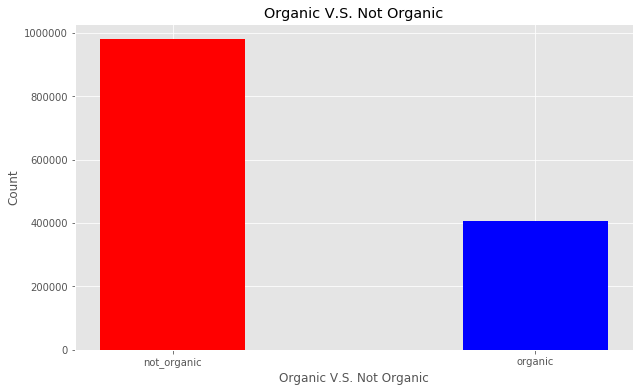

In [221]:
# Draw a bar chart for organic v.s. not organic and set up different colors - solution 1
# No need to drop the colummn the won't be used

# first, identify the size of the figure
plt.figure(figsize=(10,6))

# second, draw two bars with different colors
my_colors='rb'# set the color of the first bar chart to red and the second one to blue; r means read and b means blue

# set x axis to be organic_pct.index and y axis to be organic_pct['count']
plt.bar(organic_pct.index, organic_pct['count'],width=0.4, color=my_colors) # width adjusts the width of bars

# third, add x label, y label and title
plt.xlabel('Organic V.S. Not Organic') # add to x-label to the plot
plt.ylabel('Count') # add y-label to the plot
plt.title('Organic V.S. Not Organic') # add title to the plot

plt.show()

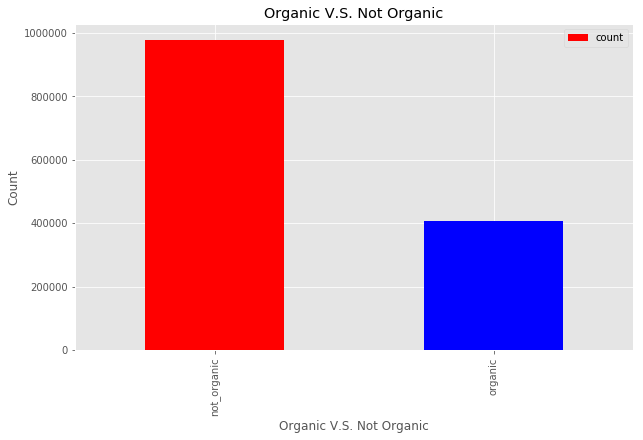

In [189]:
# Draw a bar chart for organic v.s. not organic and set up different colors - solution 2
# Need to drop the column that won't be used


# First, drop the column 'proportion' that we won't draw
pct=organic_pct.drop('proportion', 1)
pct

# Second, Identify kind, size and colors
my_colors='rb'# set the color of the first bar chart to red and the second one to blue; r means read and b means blue
pct.plot(kind='bar', figsize=(10, 6), color=my_colors) # width adjusts the width of bars

# Third, add x and y labels and the title
plt.xlabel('Organic V.S. Not Organic') # add to x-label to the plot
plt.ylabel('Count') # add y-label to the plot
plt.title('Organic V.S. Not Organic') # add title to the plot
#plt.ylim((0.4,0.7)) # adjust the range of y axis so that the difference between bars are more clear

plt.show()

## Visualizing the Product Portfolio

Here is use to treemap package to visualize the structure of instacarts product portfolio. In total there are 21 departments containing 134 aisles.

In [54]:
products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [55]:
# Merge products with departments
p_dept = pd.merge(products, departments, how='left', on='department_id', validate = 'm:1') # validate = 'm:1' means check if merge keys are unique in right datasets and not unique in left side. If not, an error will be reported

In [56]:
p_dept

,product_id,product_name,aisle_id,department_id,department
0,1,Chocolate Sandwich Cookies,61,19,snacks
1,2,All-Seasons Salt,104,13,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen
4,5,Green Chile Anytime Sauce,5,13,pantry
...,...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5,alcohol
49684,49685,En Croute Roast Hazelnut Cranberry,42,1,frozen
49685,49686,Artisan Baguette,112,3,bakery
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8,pets


In [57]:
# Merge products with departments
p_dept_aisles = pd.merge(p_dept, aisles, how='left', on='aisle_id', validate='m:1') # validate = 'm:1' means check if merge keys are unique in right datasets and not unique in left side. If not, an error will be reported

In [58]:
p_dept_aisles

,product_id,product_name,aisle_id,department_id,department,aisle
0,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes
1,2,All-Seasons Salt,104,13,pantry,spices seasonings
2,3,Robust Golden Unsweetened Oolong Tea,94,7,beverages,tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen,frozen meals
4,5,Green Chile Anytime Sauce,5,13,pantry,marinades meat preparation
...,...,...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5,alcohol,spirits
49684,49685,En Croute Roast Hazelnut Cranberry,42,1,frozen,frozen vegan vegetarian
49685,49686,Artisan Baguette,112,3,bakery,bread
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8,pets,cat food care


### How many unique products are offered in each department?

In [59]:
# How many products in each department?
p_dept_a = p_dept_aisles.groupby(['department'],sort=0).apply( lambda g: pd.Series({\
    'Products_Num': g.product_id.nunique(),\
    }))

In [60]:
# reset index
p_dept_a=p_dept_a.reset_index()

In [61]:
p_dept_a

,department,Products_Num
0,snacks,6264
1,pantry,5371
2,beverages,4365
3,frozen,4007
4,personal care,6563
5,dairy eggs,3449
6,household,3085
7,babies,1081
8,meat seafood,907
9,dry goods pasta,1858


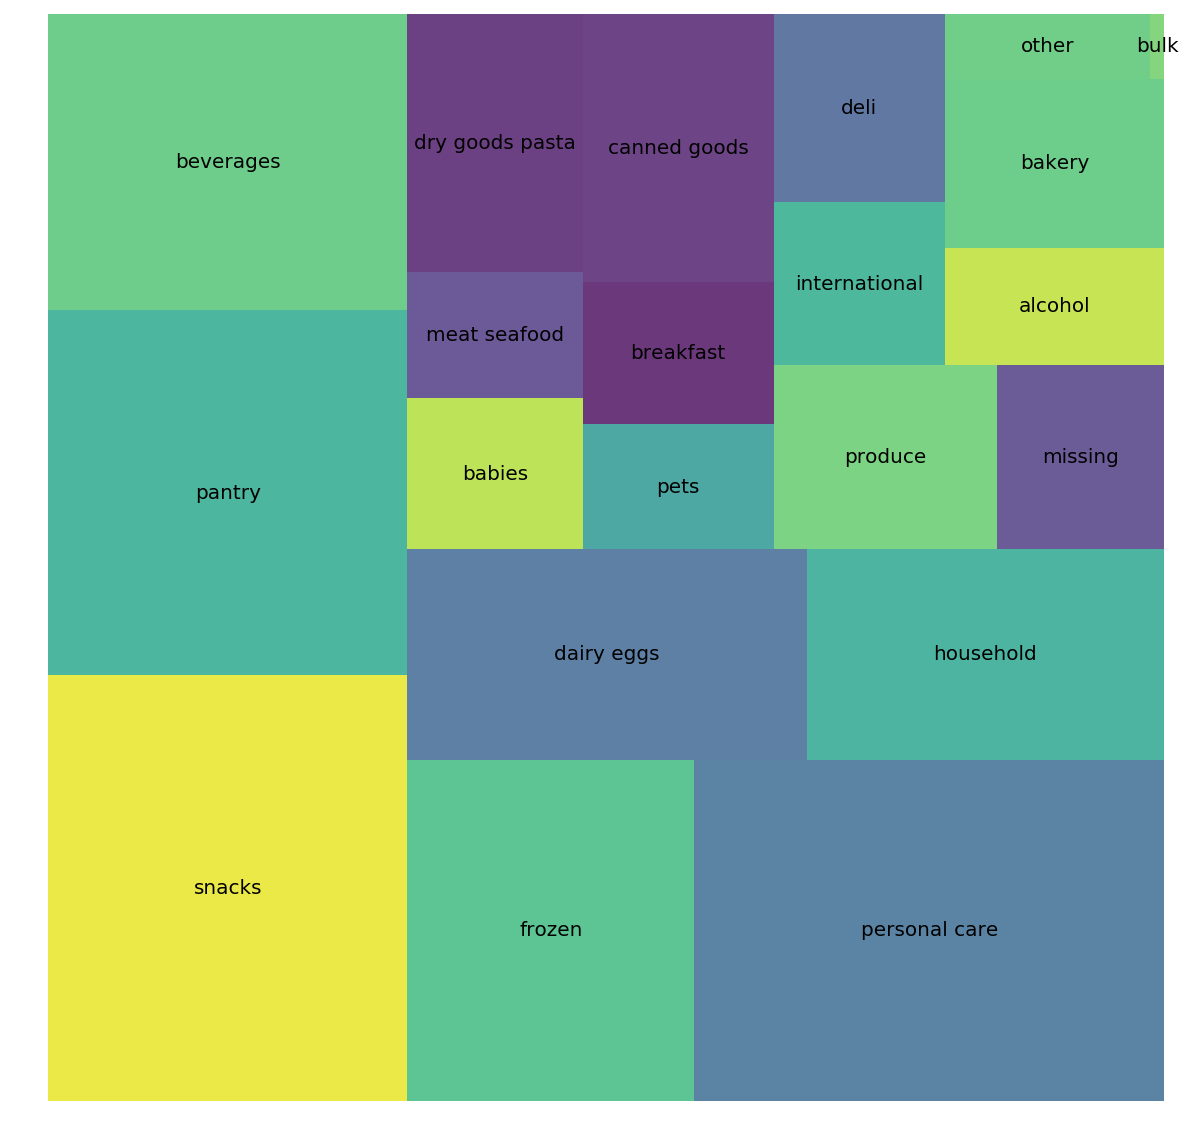

In [64]:
import matplotlib.pyplot as plt
import squarify    # pip install squarify (algorithm for treemap)

fig = plt.gcf()
fig.set_size_inches(20, 20) # adjust figure size

#plt.rc('font', size=18) # plt.rc can also adjust the font size

squarify.plot(sizes=p_dept_a['Products_Num'], label=p_dept_a['department'], alpha=.8, bar_kwargs={'alpha':.7}, text_kwargs={'fontsize':20})
                                                                    # text_kwargs={'fontsize':15} adjusts font size
plt.axis('off')
plt.show()

### Good resouces of Python treemap
https://fcpython.com/visualisation/python-treemaps-squarify-matplotlib

https://python-graph-gallery.com/200-basic-treemap-with-python/

### How often are products from the department/aisle sold?

In [65]:
order_products_train

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


In [66]:
# How many times a product was sold?
p_sold_num = order_products_train.groupby(['product_id'],sort=0).apply( lambda g: pd.Series({\
    'sold_num': g.product_id.count(),\
    }))

In [67]:
p_sold_num

,sold_num
product_id,
49302,8
11109,144
10246,1062
49683,2413
43633,24
...,...
1528,1
47935,1
9491,1


In [73]:
# Merge products with aisle
p_sold_p = pd.merge(p_sold_num, products, how='left', on='product_id', validate='1:1') # validate = '1:1' means check if merge keys are unique on both side. If not, an error will be reported

In [74]:
p_sold_p

,product_id,sold_num,product_name,aisle_id,department_id
0,49302,8,Bulgarian Yogurt,120,16
1,11109,144,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16
2,10246,1062,Organic Celery Hearts,83,4
3,49683,2413,Cucumber Kirby,83,4
4,43633,24,Lightly Smoked Sardines in Olive Oil,95,15
...,...,...,...,...,...
39118,1528,1,Sprinkles Decors,97,13
39119,47935,1,Classic Original Lip Balm SPF 12,73,11
39120,9491,1,Goats Milk & Chai Soap,25,11
39121,16380,1,Stevia Sweetener,97,13


In [93]:
# Merge products with department
p_sold_p_d = pd.merge(p_sold_p, departments, how='left', on='department_id', validate='m:1') # validate = 'm:1' means check if merge keys is unique on right side and not unique on left side. If not, an error will be reported

In [94]:
p_sold_p_d

,product_id,sold_num,product_name,aisle_id,department_id,department
0,49302,8,Bulgarian Yogurt,120,16,dairy eggs
1,11109,144,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,dairy eggs
2,10246,1062,Organic Celery Hearts,83,4,produce
3,49683,2413,Cucumber Kirby,83,4,produce
4,43633,24,Lightly Smoked Sardines in Olive Oil,95,15,canned goods
...,...,...,...,...,...,...
39118,1528,1,Sprinkles Decors,97,13,pantry
39119,47935,1,Classic Original Lip Balm SPF 12,73,11,personal care
39120,9491,1,Goats Milk & Chai Soap,25,11,personal care
39121,16380,1,Stevia Sweetener,97,13,pantry


In [95]:
# How many products does each department sold?
depart_sold_num = p_sold_p_d.groupby(['department'],sort=0).apply( lambda g: pd.Series({\
    'sold_num_dept': g.sold_num.sum(),\
    }))

In [96]:
depart_sold_num

,sold_num_dept
department,
dairy eggs,217051
produce,409087
canned goods,46799
beverages,114046
deli,44291
snacks,118862
pantry,81242
frozen,100426
meat seafood,30307


In [97]:
# reset inex
depart_sold_num=depart_sold_num.reset_index()
depart_sold_num

,department,sold_num_dept
0,dairy eggs,217051
1,produce,409087
2,canned goods,46799
3,beverages,114046
4,deli,44291
5,snacks,118862
6,pantry,81242
7,frozen,100426
8,meat seafood,30307
9,household,35986


In [98]:
depart_sold_num['sold_num_dept']

0     217051
1     409087
2      46799
3     114046
4      44291
5     118862
6      81242
7     100426
8      30307
9      35986
10     48394
11     21570
12     38713
13     14941
14      8251
15      1795
16     29500
17     11902
18      5598
19      1359
20      4497
Name: sold_num_dept, dtype: int64

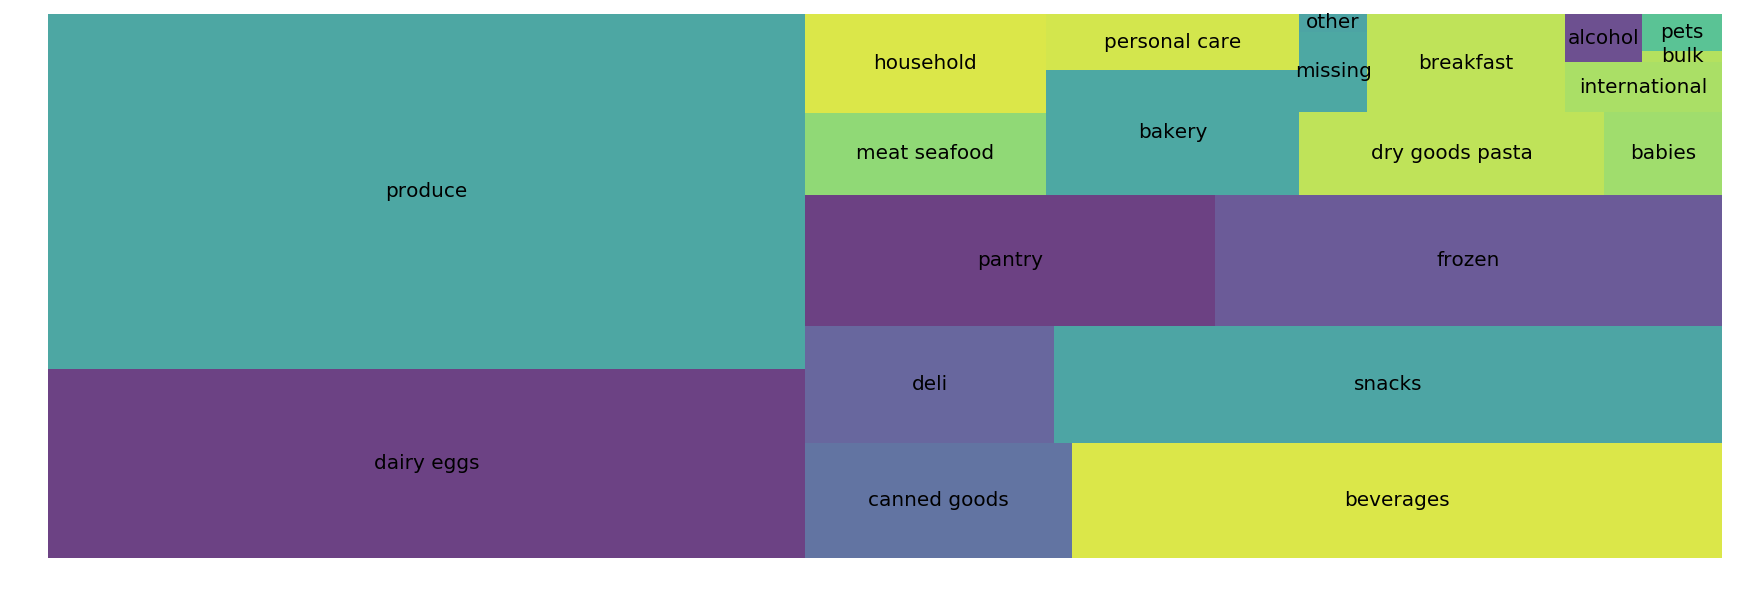

In [103]:
# Draw a treemap
fig = plt.gcf()
fig.set_size_inches(30, 10) # adjust figure size

#plt.rc('font', size=18) # plt.rc can also adjust the font size

squarify.plot(sizes=depart_sold_num['sold_num_dept'], label=depart_sold_num['department'], alpha=.8, bar_kwargs={'alpha':.7}, text_kwargs={'fontsize':20})
                                                                    # text_kwargs={'fontsize':15} adjusts font size
plt.axis('off')
plt.show()

## Exploring Customer Habits

Here I look for customers who just reorder the same products again all the time. To search those I look at all orders (excluding the first order), where the percentage of reordered items is exactly 1 (This can easily be adapted to look at more lenient thresholds). We can see there are in fact 3,487 customers, just always reordering products.

### Customers reordering only

In [105]:
order_products_prior

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


In [110]:
# calculate the probability of being reordered for each order_id. Prior data are used here
prop_reordered_pr = order_products_prior.groupby('order_id').apply(lambda g: pd.Series({\
                                        'proportion_reordered': g.reordered.mean(),\
                                        'order_number': g.product_id.count(),\
}))

In [113]:
orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [111]:
prop_reordered_pr

,proportion_reordered,order_number
order_id,,
2,0.666667,9.0
3,1.000000,8.0
4,0.923077,13.0
5,0.807692,26.0
6,0.000000,3.0
...,...,...
3421079,0.000000,1.0
3421080,0.444444,9.0
3421081,0.000000,7.0


In [117]:
# merge prop_reordered_pr with orders
tmp=pd.merge(prop_reordered_pr, orders, how='left', on='order_id', validate='1:m') # validate = '1:m' means check if merge keys is unique on right side and not unique on left. if not, an error will be returned.

In [118]:
# order_number_y comes from the orders table and means the order of being put into cart; 
# order_number_x comes from the prop_reordered_pr table and means the amount of orders
tmp

,order_id,proportion_reordered,order_number_x,user_id,eval_set,order_number_y,order_dow,order_hour_of_day,days_since_prior_order
0,2,0.666667,9.0,202279,prior,3,5,9,8.0
1,3,1.000000,8.0,205970,prior,16,5,17,12.0
2,4,0.923077,13.0,178520,prior,36,1,9,7.0
3,5,0.807692,26.0,156122,prior,42,6,16,9.0
4,6,0.000000,3.0,22352,prior,4,1,12,30.0
...,...,...,...,...,...,...,...,...,...
3214869,3421079,0.000000,1.0,108687,prior,6,1,13,0.0
3214870,3421080,0.444444,9.0,52726,prior,2,1,11,2.0
3214871,3421081,0.000000,7.0,117076,prior,1,3,11,NaN
3214872,3421082,0.571429,7.0,175185,prior,23,2,18,4.0


In [120]:
# only keep the order_number_y>2. only keeping order_number>2 means only keeping orders that are not the first the order
tmp = tmp[tmp['order_number_y']>2]

In [121]:
tmp

,order_id,proportion_reordered,order_number_x,user_id,eval_set,order_number_y,order_dow,order_hour_of_day,days_since_prior_order
0,2,0.666667,9.0,202279,prior,3,5,9,8.0
1,3,1.000000,8.0,205970,prior,16,5,17,12.0
2,4,0.923077,13.0,178520,prior,36,1,9,7.0
3,5,0.807692,26.0,156122,prior,42,6,16,9.0
4,6,0.000000,3.0,22352,prior,4,1,12,30.0
...,...,...,...,...,...,...,...,...,...
3214866,3421076,0.875000,8.0,193225,prior,18,5,13,4.0
3214868,3421078,0.777778,9.0,70170,prior,10,5,11,7.0
3214869,3421079,0.000000,1.0,108687,prior,6,1,13,0.0
3214872,3421082,0.571429,7.0,175185,prior,23,2,18,4.0


In [122]:
# only keep the eval_set==prior
tmp=tmp[tmp['eval_set'] =='prior']

In [123]:
tmp

,order_id,proportion_reordered,order_number_x,user_id,eval_set,order_number_y,order_dow,order_hour_of_day,days_since_prior_order
0,2,0.666667,9.0,202279,prior,3,5,9,8.0
1,3,1.000000,8.0,205970,prior,16,5,17,12.0
2,4,0.923077,13.0,178520,prior,36,1,9,7.0
3,5,0.807692,26.0,156122,prior,42,6,16,9.0
4,6,0.000000,3.0,22352,prior,4,1,12,30.0
...,...,...,...,...,...,...,...,...,...
3214866,3421076,0.875000,8.0,193225,prior,18,5,13,4.0
3214868,3421078,0.777778,9.0,70170,prior,10,5,11,7.0
3214869,3421079,0.000000,1.0,108687,prior,6,1,13,0.0
3214872,3421082,0.571429,7.0,175185,prior,23,2,18,4.0


In [136]:
tmp2=tmp.groupby('user_id').apply(lambda g: pd.Series({\
                            'n_equal': g.order_id.count()\
    
}))

In [144]:
tmp2.sort_values(by='n_equal', ascending=False)

,n_equal
user_id,
152340,97
185641,97
185524,97
81678,97
70922,97
...,...
13046,1
70208,1
111440,1


### The customer with the strongest habit